### Intersezione tra retta C1 e retta C2, nell'intorno di XiA

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
xdata = np.array([0.235, 0.245, 0.255, 0.265, 0.275])
yerr = np.array([0.001]*5)

In [4]:
#Massa fissa, coltello 1
ydata = np.array([2.022, 2.011, 2.000, 1.990, 1.980])
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
npoint = len(xdata)
npoint

5

In [5]:
#Massa mobile, coltello 2
ydata1 = np.array([2.007,2.004,2.002,2.000,1.997])
if (len(xdata)!=len(ydata1)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata1)): print ("dimensioni vettori disuguali")
npoint = len(xdata)
npoint

5

Determiniamo i parametri $a$ and $b$ della retta di best fit $y = b x + a$ che minimizza:
$ \chi^2 = \sum_i \frac{(y_i - b x_i - a)^2}{\sigma_i^2}$
    
$a$ e $b$ sono soluzioni del sistema lineare:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}
\end{bmatrix}$
$\begin{bmatrix} a\\b \end{bmatrix}$ = 
$\begin{bmatrix} \sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [6]:
#Retta C1
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_xSq_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()

In [7]:
#Retta C2
sum_y_over_yerrSq1 = (ydata1/yerrSq).sum() # diverso da C1
sum_xy_over_yerrSq1 = (xdata*ydata1/yerrSq).sum() # diverso da C1

Calcolo Coefficiente correlazione lineare

In [8]:
#Retta C1
sum_x = (xdata).sum()
sum_y = (ydata).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdata-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydata-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print ("coefficiente correlazione retta C1 massa fissa = ",corrcoeff)

coefficiente correlazione retta C1 massa fissa =  -0.999682690774179


In [9]:
#Retta C2
sum_y1 = (ydata1).sum()
ymean1=sum_y1/npoint
ameany1 = ydata1-ymean1
vary1 = (ameany1*ameany1).sum()
devsty1 = np.sqrt(vary1)
covx1y1 = (ameanx*ameany1).sum()
corrcoeff1=covx1y1/(devstx*devsty1)
print ("coefficiente correlazione retta C2 massa mobile = ",corrcoeff1)

coefficiente correlazione retta C2 massa mobile =  -0.9965457582448797


In [10]:
#Retta C1
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
matD

array([[5000000., 1275000.],
       [1275000.,  326125.]])

In [11]:
#Retta C1
matD_inv = np.linalg.inv(matD)
matD_inv

array([[ 6.5225e-05, -2.5500e-04],
       [-2.5500e-04,  1.0000e-03]])

Check D^(-1)D = I

In [12]:
#Retta C1
np.dot(matD,matD_inv)

array([[ 1.00000000e+00, -2.88529617e-13],
       [-1.79294513e-15,  1.00000000e+00]])

In [13]:
#Retta C1
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
matB

array([10003000.,  2549715.])

In [14]:
#Retta C2
matB1 = np.array([sum_y_over_yerrSq1,sum_xy_over_yerrSq1])
matB1

array([10010000.,  2552310.])

In [15]:
#Retta C1
np.dot(matD_inv,matB)

array([ 2.26835, -1.05   ])

In [16]:
#Retta C2
np.dot(matD_inv,matB1)

array([ 2.0632, -0.24  ])

Calcolo parametri fit

In [17]:
a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]
print ("Parametri retta massa fissa, Coltello 1")
print (" intercetta a (s)= ", a)
print (" coeff.angolare b (s/m)= ", b)

Parametri retta massa fissa, Coltello 1
 intercetta a (s)=  2.2683499999999412
 coeff.angolare b (s/m)=  -1.050000000000182


In [18]:
a1, b1 = np.dot(matD_inv,matB1)[0],np.dot(matD_inv,matB1)[1]
print ("Parametri retta massa mobile, Coltello 2")
print (" intercetta a1 (s)= ", a1)
print (" coeff.angolare b1 (s/m)= ", b1)

Parametri retta massa mobile, Coltello 2
 intercetta a1 (s)=  2.0631999999998243
 coeff.angolare b1 (s/m)=  -0.23999999999978172


Calcolo errori sui parametri

In [19]:
siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print ("Errore su parametri retta (sono uguali per le due rette): ")
print (" errore su intercetta (a) siga (s)= ",siga)
print (" errore su coeff.angolare (b) sigb (s/m)= ",sigb)

Errore su parametri retta (sono uguali per le due rette): 
 errore su intercetta (a) siga (s)=  0.008076199601297653
 errore su coeff.angolare (b) sigb (s/m)=  0.03162277660168388


In [20]:
#covarianze
print('Covarianza parametri retta C1 (a1b1) = ', covxy)
print('Covarianza parametri retta C2 (a2b2) = ', covx1y1)

Covarianza parametri retta C1 (a1b1) =  -0.0010499999999999984
Covarianza parametri retta C2 (a2b2) =  -0.00024000000000000044


In [21]:
print('Equazione retta C1 massa fissa: ')
print(' C1:', round(b,2),'x +', round(a,2))
print('Equazione retta C2 massa mobile: ')
print(' C2:', round(b1,2),'x +', round(a1,2))

Equazione retta C1 massa fissa: 
 C1: -1.05 x + 2.27
Equazione retta C2 massa mobile: 
 C2: -0.24 x + 2.06


Plot

<ErrorbarContainer object of 3 artists>

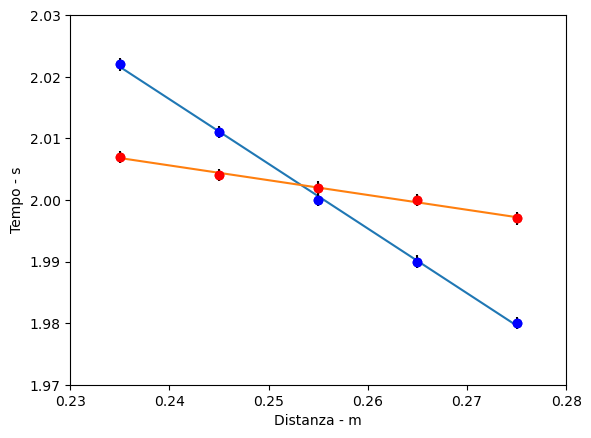

In [22]:
fig, ax = plt.subplots()
ax.set_ylim(1.970,2.030)
ax.set_xlim(0.23, 0.28)
ax.set_xlabel('Distanza - m')
ax.set_ylabel('Tempo - s')

# Plot delle linee di fit
plt.plot(xdata, b * xdata + a, label='Fit 1')
plt.plot(xdata, b1 * xdata + a1, label='Fit 2')

# Plot dei dati
plt.plot(xdata, ydata, 'bo', label='Dati 1')
plt.plot(xdata, ydata1, 'ro', label='Dati 2')

# Error bars
plt.errorbar(xdata, ydata, yerr=yerr, fmt='bo', ecolor='black')
plt.errorbar(xdata, ydata1, yerr=yerr, fmt='ro', ecolor='black')

Calcolo X^2 e errore standard della stima

In [23]:
scarto1 = (ydata-a-b*xdata)/yerr
scarto2 = (ydata-a-b*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)

 Chi^2 =  0.6999999999997791
 errore standard della stima (u.m.) =  0.00048304589153957175
